# DATASET과 DATALOADER
- 데이터 샘플을 처리하는 코드는 지저분하고 유지보수가 어려울 수 있다.  
- 더 나은 가독성과 모듈성을 위해 데이터셋 코드를 모델 학습 코드로부터 분리하는 것이 이상적이다.  
- torch.utils.data.DataLoader 와 torch.utils.data.Dataset 의 두 가지 데이터 기본 요소를 제공
- 미리 준비해준 데이터셋 뿐 아니라 가지고 있는 데이터를 사용할 수 있도록
- 샘플과 정답을 저장하고, dataloader는 dataset을 샘플에 쉽게 접근할 수 있도록 가능한 객체를 감싼다.
- 데이터셋은 torch.utils.data.Dataset의 하위 클래스로 개별 데이터를 특정하는 함수가 구현
- 이미지 데이터셋, 텍스트 데이터셋 및 오디오 데이터셋

## 데이터셋 불러오기
torchvision에서 Fashion-MNIST 데이터셋을 불러오는 예제르 살펴보겠습니다. 60000개의 학습 데이터와 10000개의 테스트 데이터로 구성되어있다.
각 예제는 흑백의 28x28 이미지와 10개 분류 중 하나의 정답으로 구성

다음 매개변수들을 사용하여 FashionMNIST 데이터셋 을 불러옵니다:
root 는 학습/테스트 데이터가 저장되는 경로입니다.
train 은 학습용 또는 테스트용 데이터셋 여부를 지정합니다.
download=True 는 root 에 데이터가 없는 경우 인터넷에서 다운로드합니다.
transform 과 target_transform 은 특징(feature)과 정답(label) 변형(transform)을 지정합니다.  
다음 매개변수들을 사용하여 FashionMNIST 데이터셋 을 불러옵니다:
- root 는 학습/테스트 데이터가 저장되는 경로입니다.
- train 은 학습용 또는 테스트용 데이터셋 여부를 지정합니다.
- download=True 는 root 에 데이터가 없는 경우 인터넷에서 다운로드합니다.
- transform 과 target_transform 은 특징(feature)과 정답(label) 변형(transform)을 지정합니다.


In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [9]:
training_data = datasets.FashionMNIST(
    root ='data',
    train = True,
    download =True,
    transform = ToTensor())

test_data = datasets.FashionMNIST(
    root = 'data',
    train= False,
    download = True,
    transform = ToTensor())


## 데이터셋을 순회하고 시각화하기
데이터셋에 리스트처럼 직접 접근할 수 있다. training_data[index], matplotlib을 사용하여 학습 데이터의 일부를 시각화

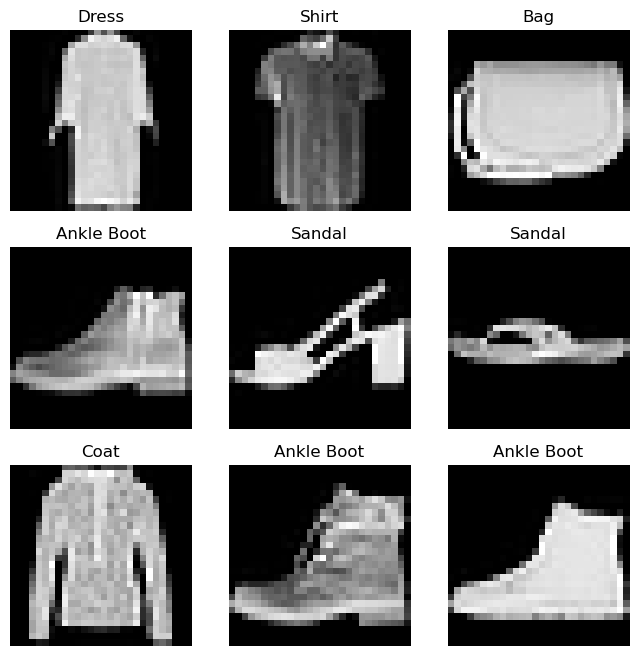

In [11]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

##  파일에서 사용자 정의 데이터셋 만들기
사용자 정의 함수
- __init__
- __len__
- __getitem__

  이미지들의 img_dir에 저장, 정답은 annotations_file csv 파일에 별도로 저장

In [24]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, trainsform = None, target_transform = None):
        self.img_labels - pd.read_csv(annotations_file, names = ['file_name','label'])
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self, img_labels)

    def __getitem__(self,idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx,0])
        imge = read_image(img_path)
        label = self.img_labels.iloc[idx,1]
        
        if self.transform :
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label
        

** __init__ **
  
데이터셋 객체가 생성될 떄 한번만 실행됩니다. 여기서 이미지와 주석 파일이 포함된 디렉토리와 두가지 transform을 초기화한다.

In [15]:
def __init__(self, annotation_file, img_dir, transform = None, target_transform = None):
    self.img_labels = pd.read_csv(annotation_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

** __len__  **  

__len__ 함수는 데이터셋의 샘플 개수를 반환한다.

In [16]:
def __len__(self):
    return len(self.img_labels)

** __getitem__ **
주어진 인덱스 idx에 해당하는 샘플을 데이터셋에서 불러오고 반환한다. 인덱스를 기반으로 디스크에서 이미지의 위치를 식별하고, read_image를 사용하여 이미지를 텐서로 변환, self.img_labels의 csv 데이터로부터 해당하는 label을 가져오고, 변형함수들을 호출한 뒤, 텐서 이미지와 라벨을 python dict형으로 반환한다.

In [25]:
def __getitem(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx,0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx,1]
    if self.transform :
        image = self.transform(image)
    if self.target_transform :
        label = self.target_transform(label)
    sample = {'image' : image, 'label' : label}
    return sample

## DataLoader로 학습용 데이터 준비하기
데이터셋의 특징을 가져오고 하나의 샘플에 정답을 지정하는 일을 한번에 한다. 모델을 학습할 때, 일반적으로 샘플들을 미니배치로 전달하고 매 에폭마다 데이터를 섞어서 과적합을 막고, python의 multiprocessing을 사용하여 데이터 검색 속도를 높이려고 한다.  
DataLoader 는 간단히 API로 이런한 복잡한 과정들을 추상화한 순회 가능한 객체이다.

In [19]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size = 64, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle = True)

## DataLoader를 통해 순회하기(iterate)
DataLoader에 데이터셋을 불러온 뒤에는 필요에 따라 데이터셋을 순회할 수 있다. 아래의 각 순회는 train_features와 train_labels의 묶음을 반환한다. shuffle =True로 지정했으므로, 모든 배치를 순회한 뒤 데이터가 섞인다. (데이터 불러오기 순서를 보다 세밀하게 제어하려면 Samplers를 살펴보면 된다.)

Feature batch shape : torch.Size([64, 1, 28, 28])
Labels batch shape : torch.Size([64])


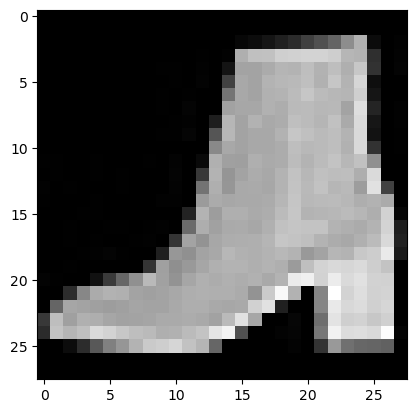

Label: 9


In [22]:
# 이미지와 정답을 표시
train_features, train_labels = next(iter(train_dataloader))
print(f'Feature batch shape : {train_features.size()}')
print(f'Labels batch shape : {train_labels.size()}')
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap = 'gray')
plt.show()
print(f'Label: {label}')